In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

/home/user1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [3]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-12 13:25:29] Features: 1/41 -- score: -58.8975513095[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished

[2017-11-12 13:25:29] Features: 2/41 -- score: -53.4061901501[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished

[2017-11-12 13:25:30] Features: 3/41 -- score: -52.5390767571[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.4s finished

[2017-11-12 13:25:30] Features: 4/41 -- score: -51.6048403888[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.4s finished

[

[2017-11-12 13:25:47] Features: 40/41 -- score: -52.2393435113[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2017-11-12 13:25:47] Features: 41/41 -- score: -52.6409808136

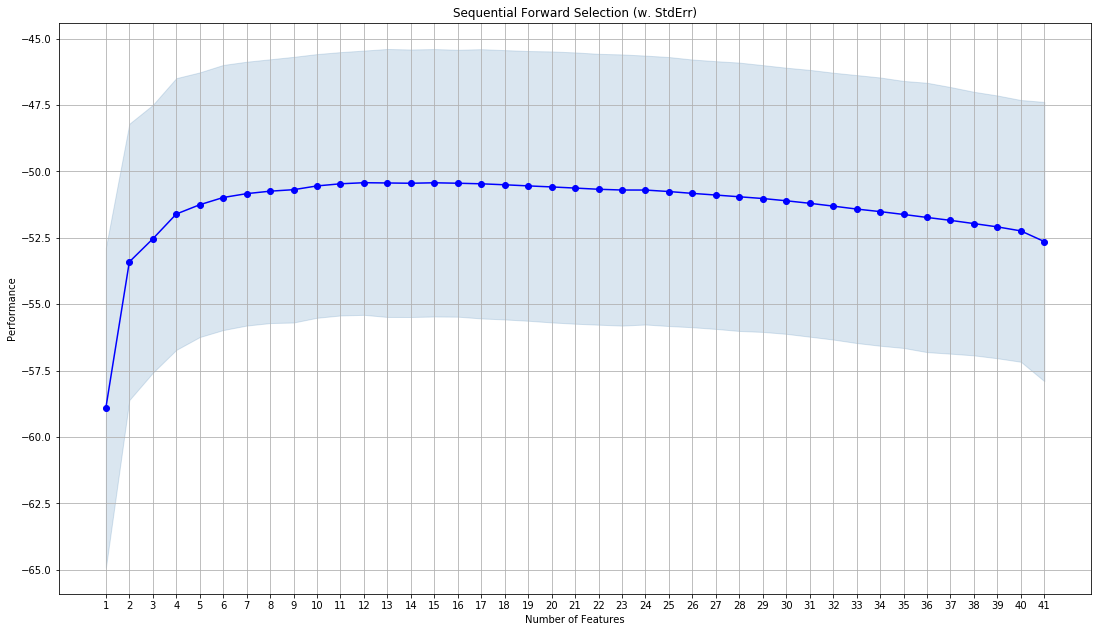

In [4]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [5]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-58.8976,13.4252,"[-48.8440193165, -34.1005103324, -37.770930659...","(31,)",18.0759,6.02532
2,-53.4062,11.5875,"[-41.7307680177, -31.3714679148, -36.789617681...","(36, 31)",15.6016,5.20053
3,-52.5391,11.2335,"[-46.0356748818, -33.1614311272, -34.385293444...","(40, 36, 31)",15.1249,5.04164
4,-51.6048,11.3949,"[-46.7028212836, -33.6889756747, -32.208766096...","(40, 9, 36, 31)",15.3423,5.11411
5,-51.2546,11.098,"[-45.1437834101, -33.2853125783, -32.432406614...","(36, 40, 9, 11, 31)",14.9425,4.98083
6,-50.9825,11.1171,"[-43.3229301032, -32.9926422294, -33.055635744...","(0, 36, 40, 9, 11, 31)",14.9683,4.98942
7,-50.8372,11.0646,"[-42.9924763628, -32.4021596276, -33.400353498...","(0, 36, 40, 9, 11, 17, 31)",14.8976,4.96586
8,-50.7441,11.062,"[-43.2529154057, -32.195549991, -33.1696753342...","(0, 36, 40, 9, 11, 17, 29, 31)",14.894,4.96468
9,-50.6881,11.1404,"[-42.8940833926, -32.1486265906, -33.139956978...","(0, 9, 11, 17, 21, 29, 31, 36, 40)",14.9996,4.99988
10,-50.5466,11.0588,"[-42.7049896308, -32.1871266918, -33.345077541...","(0, 9, 11, 17, 18, 21, 29, 31, 36, 40)",14.8897,4.96324


#### simple greedy solution: 


In [6]:
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy[df_features_forward_greedy['avg_score'] == df_features_forward_greedy['avg_score'].max()]['feature_idx']
greedy_selected_columns_index=selected_column_indice.tolist()
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print("Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list)

Selected columns by simple greedy sequential forward selection are: 
 ['defencePressure_home', 'defenceTeamWidth_away', 'buildUpPlayPassing_home', 'defenceAggression_away', 'buildUpPlaySpeed_away', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'BWD', 'WHH', 'IWA', 'B365H', 'buildUpPlayPassing_away']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-12 13:26:05] Features: 1/41 -- score: -58.8975513095[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-11-12 13:26:05] Features: 2/41 -- score: -53.4061901501[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2017-11-12 13:26:06] Features: 3/41 -- score: -52.5390767571[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2017-11-12 13:26:21] Features: 18/41 -- score: -50.4561323806[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2017-11-12 13:26:22] Features: 19/41 -- score: -50.491865947[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2017-11-12 13:26:23] Features: 20/41 -- score: -50.52

[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.8s finished

[2017-11-12 13:26:57] Features: 39/41 -- score: -52.0843784939[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.0s finished

[2017-11-12 13:26:59] Features: 40/41 -- score: -52.2393435113[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.9s finished

[2017-11-12 13:27:03] Features: 41/41 -- score: -52.6409808136

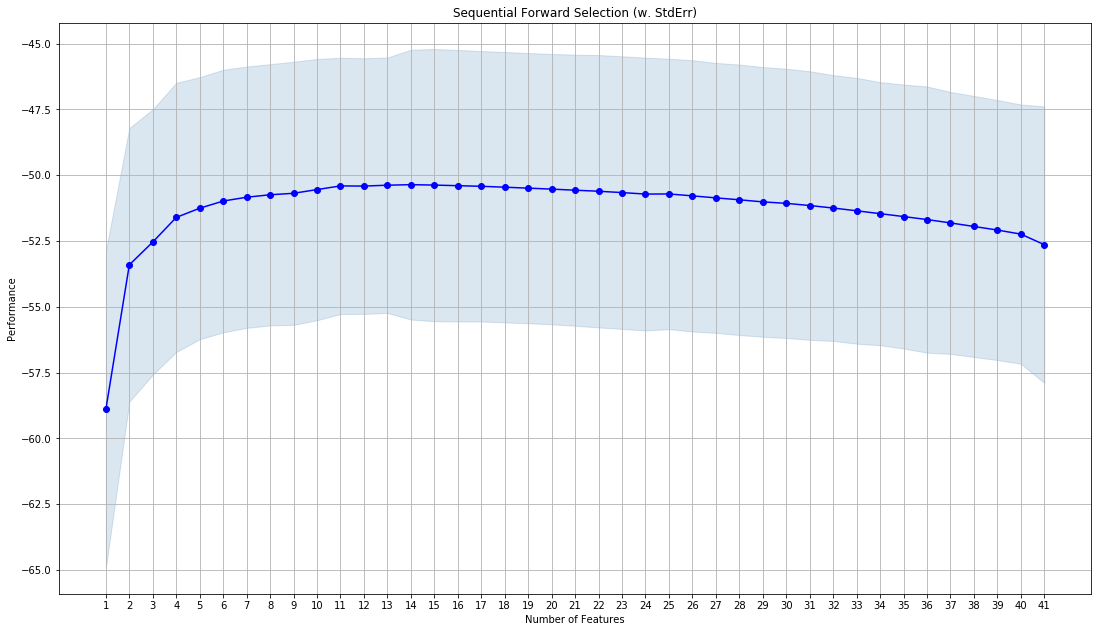

In [7]:
lr = linear_model.LinearRegression()
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [8]:
df_features_forward_float = pd.DataFrame.from_dict(sfs_float.get_metric_dict()).T
df_features_forward_float

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-58.8976,13.4252,"[-48.8440193165, -34.1005103324, -37.770930659...","(31,)",18.0759,6.02532
2,-53.4062,11.5875,"[-41.7307680177, -31.3714679148, -36.789617681...","(36, 31)",15.6016,5.20053
3,-52.5391,11.2335,"[-46.0356748818, -33.1614311272, -34.385293444...","(40, 36, 31)",15.1249,5.04164
4,-51.6048,11.3949,"[-46.7028212836, -33.6889756747, -32.208766096...","(40, 9, 36, 31)",15.3423,5.11411
5,-51.2546,11.098,"[-45.1437834101, -33.2853125783, -32.432406614...","(36, 40, 9, 11, 31)",14.9425,4.98083
6,-50.9825,11.1171,"[-43.3229301032, -32.9926422294, -33.055635744...","(0, 36, 40, 9, 11, 31)",14.9683,4.98942
7,-50.8372,11.0646,"[-42.9924763628, -32.4021596276, -33.400353498...","(0, 36, 40, 9, 11, 17, 31)",14.8976,4.96586
8,-50.7441,11.062,"[-43.2529154057, -32.195549991, -33.1696753342...","(0, 36, 40, 9, 11, 17, 29, 31)",14.894,4.96468
9,-50.6881,11.1404,"[-42.8940833926, -32.1486265906, -33.139956978...","(0, 9, 11, 17, 21, 29, 31, 36, 40)",14.9996,4.99988
10,-50.5466,11.0588,"[-42.7049896308, -32.1871266918, -33.345077541...","(0, 9, 11, 17, 18, 21, 29, 31, 36, 40)",14.8897,4.96324


#### float solution: 

In [9]:
float_selected_columns_index=list()

selected_column_indice=df_features_forward_float[df_features_forward_float['avg_score'] == df_features_forward_float['avg_score'].max()]['feature_idx']
float_selected_columns_index=selected_column_indice.tolist()
float_selected_colname_list = df_before_match_out_training.columns[float_selected_columns_index].tolist()
print("Selected columns by float greedy sequential forward selection are: \n",float_selected_colname_list)

Selected columns by float greedy sequential forward selection are: 
 ['defencePressure_home', 'WHA', 'defenceTeamWidth_away', 'buildUpPlayPassing_home', 'defenceAggression_away', 'chanceCreationPassing_home', 'buildUpPlaySpeed_away', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'chanceCreationCrossing_home', 'WHH', 'VCD', 'B365H', 'buildUpPlayPassing_away']


## Use the selected columns from both simple greedy and float greedy to use on the outter layer holdout validation

#### 1. Simple Greedy

In [10]:
df_before_match_greedy_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_greedy_test=df_before_match_out_test[greedy_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_greedy_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_greedy_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist()))


0.355380932875


In [11]:
df_before_match_float_training=df_before_match_out_training[float_selected_colname_list]
df_before_match_float_test=df_before_match_out_test[float_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_float_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_float_pred = lr_greedy.predict(df_before_match_float_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_float_pred.tolist()))

0.357256590893


## ANN

In [12]:
df_before_match.head()

,defencePressure_home,VCH,BWA,WHA,defenceTeamWidth_away,chanceCreationPositioningClass_away_isOrganised,buildUpPlayPositioningClass_away_isOrganised,chanceCreationCrossing_away,chanceCreationPositioningClass_home_isOrganised,buildUpPlayPassing_home,...,VCD,B365D,defenceAggression_home,chanceCreationPassing_away,B365H,BWH,stage,defenceTeamWidth_home,buildUpPlayPassing_away,possession_home
0,45,1.95,4.00,3.75,40,True,True,70,True,60,...,3.40,3.50,55,60,1.83,1.80,2,45,65,57
1,35,3.60,2.05,2.15,30,False,True,70,True,70,...,3.25,3.30,70,65,3.60,3.45,21,35,59,57
2,30,1.80,4.50,4.33,70,True,True,70,True,30,...,3.50,3.60,70,70,1.80,1.72,21,30,70,60
3,65,2.50,2.75,2.60,35,True,True,70,True,65,...,3.25,3.30,70,70,2.50,2.45,21,70,70,51
4,35,2.10,3.65,3.20,35,True,True,70,True,70,...,3.25,3.25,70,70,2.10,2.00,21,35,70,53


In [13]:
print(before_match_attributes)

['defencePressure_home', 'VCH', 'BWA', 'WHA', 'defenceTeamWidth_away', 'chanceCreationPositioningClass_away_isOrganised', 'buildUpPlayPositioningClass_away_isOrganised', 'chanceCreationCrossing_away', 'chanceCreationPositioningClass_home_isOrganised', 'buildUpPlayPassing_home', 'LBH', 'defenceAggression_away', 'buildUpPlayDribbling_away', 'chanceCreationShooting_away', 'chanceCreationPassing_home', 'buildUpPlayPositioningClass_home_isOrganised', 'IWH', 'buildUpPlaySpeed_away', 'buildUpPlaySpeed_home', 'chanceCreationShooting_home', 'VCA', 'buildUpPlayDribbling_home', 'B365A', 'LBA', 'defencePressure_away', 'BWD', 'LBD', 'chanceCreationCrossing_home', 'WHD', 'WHH', 'IWD', 'IWA', 'VCD', 'B365D', 'defenceAggression_home', 'chanceCreationPassing_away', 'B365H', 'BWH', 'stage', 'defenceTeamWidth_home', 'buildUpPlayPassing_away']


In [209]:
#before_match_attributes = ['LBH']

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

df = df_before_match

train_df, test_df = train_test_split(df, test_size=0.2)

trainX = train_df[before_match_attributes]
trainY = train_df['possession_home']

testX = test_df[before_match_attributes]
testY = test_df['possession_home']

fnn = MLPRegressor(solver='adam', alpha=1e-3,
                    hidden_layer_sizes=(256,128,64,32,),
                    random_state=1,
                    nesterovs_momentum=False,
                    momentum=0.99,
                    early_stopping=False,
                    activation='logistic',
                    batch_size=32,
                    warm_start=False,
                  max_iter=3000)

model = fnn.fit(trainX, trainY)                         


In [32]:
print(model)
print(model.loss_curve_)
print(model.n_layers_)

MLPRegressor(activation='logistic', alpha=0.001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 128, 64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.99,
       nesterovs_momentum=False, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
[1282.4039869219644, 1186.1939899734068, 1121.694502385961, 1060.0315818390202, 1004.3251424099149, 949.07630165438138, 892.92666103948841, 841.88616644160936, 794.17147912509904, 749.15781952262455, 706.46591391261074, 665.94718337432732, 627.45211122048738, 590.82063748780479, 556.01679453243798, 522.90743571697124, 491.48219039785403, 461.60503552831744, 433.22939982982842, 401.72556076969704, 370.59737886106421, 343.42085427797235, 318.66522268688561, 295.79194330611529, 274.585031551486, 254.87869059287689, 236.51783011102825, 219.50564162882688

In [33]:
model.predict(testX) - testY

1781     9.828230
1797     3.437878
3        0.442720
488      2.167781
2197    -0.634645
61       2.179847
1098     0.745328
12       5.764447
2204   -14.289848
154      2.456345
759      3.883024
34     -11.042501
614     -8.363008
2045    -0.165075
1214    -7.885014
2135     8.567968
1446    -6.216302
1701    -0.311974
2116     6.816387
1799   -14.490371
1728     3.220594
1136    -1.551150
842     -2.387852
393      3.912426
1520    16.453914
1189     0.040628
1930    18.387436
1640    -2.785219
350     -1.418339
772     -5.047883
          ...    
811     -4.763862
1713    -3.136849
2010     4.693799
757     -1.625182
327     -1.206386
2254    -5.998625
1850     2.177989
2158     2.819142
954      0.146573
195      3.728639
324      5.680544
1023     0.910191
2334    -4.382306
1017    -3.445229
1687     0.851630
1188    -4.785333
1821   -10.698455
347      3.605693
1135     6.508944
136      2.501300
280    -11.543601
1757     0.338609
311      8.899024
1289    -7.011078
625      8

In [34]:
print("Predicted: " + str(model.predict(testX.iloc[470].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[470]))

print("Predicted: " + str(model.predict(testX.iloc[123].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[123]))

print("Predicted: " + str(model.predict(testX.iloc[321].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[321]))

print("Predicted: " + str(model.predict(testX.iloc[420].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[420]))


Predicted: [ 59.33860947], actual: 59
Predicted: [ 48.04629856], actual: 36
Predicted: [ 48.5071541], actual: 45
Predicted: [ 52.64271047], actual: 43
